In [144]:
import numpy as np,matplotlib.pyplot as plt

## Proponemos la siguiente ecuación para generar la polinomial
$y = 9 + 7x + 5x^2$

Le agregaremos un cuarto elemento $\epsilon$ que será un vector de errores aleatorios

In [145]:
m = 10000 # número de muestras
X = 4 * np.random.rand(m,1)
y = 9 + 7 * X + 5 * (X**2)+ 1.5*np.random.randn(m,1)

Gráficamos los resultados para observar nuestra nube de puntos

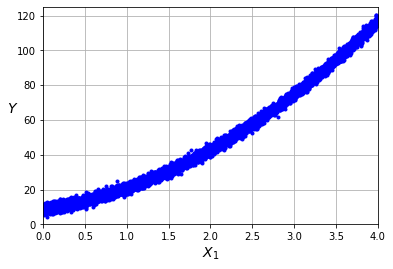

In [146]:
plt.plot(X,y,"b.") 
plt.xlabel(r'$X_1$',fontsize=14)
plt.ylabel(r'$Y$',fontsize=14,rotation=0)
plt.axis([0,4,0,125])
plt.grid(True)
plt.show()

Con ayuda de las librerias de sklearn, dividimos el dataset en entrenamiento y prueba (80 y 20 respectivamente). 

In [182]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=50)

## Para hallar los valores de $\theta$ debemos desarrollar la misma ecuación que en el caso de la regresión lineal
Esta es la ecuación para estimar el vector de coeficientes
### $\theta = (X^TX)^{-1}X^Ty$

<br>La diferencia fundamental esta en la matriz de valores X<br>
$\begin{bmatrix}
1 & x_1 & x_1^2 & ... & x_1^m\\
1 & x_2 & x_2^2 & ... & x_2^m\\
1 & x_3 & x_3^2 & ... & x_3^m\\
...&...&...&...&...\\
1 & x_n & x_n^2 & ... & x_n^m\\
\end{bmatrix}$

## Si los valores de X estuviesen en un intervalo menor, del rango de [0,1], observamos una diferencia en los resultados.

In [206]:
numerador = X_train - X_train.min()
denominador = X_train.max()-X_train.min()
X_norm = numerador/denominador

Regeneramos los valores de las $y$, para realizar los calculos nuevamente con los valores de $x$ en el rango de [0,1]

In [184]:
m_train = int(m*0.8)
y_norm = 9 + 7 * X_norm + 5 * (X_norm**2)+ 1.5*np.random.randn(m_train,1)

Matriz de los elemntos de $X$ polinomiales

In [185]:
X_bnorm = np.c_[np.ones((m_train,1)),X_norm,X_norm**2]
X_bnorm

array([[1.        , 0.59179043, 0.35021591],
       [1.        , 0.61538332, 0.37869664],
       [1.        , 0.49906913, 0.24907   ],
       ...,
       [1.        , 0.78990177, 0.6239448 ],
       [1.        , 0.24602032, 0.060526  ],
       [1.        , 0.84473457, 0.71357649]])

Obtenemos el valor de los coeficientes $\theta$

In [186]:
theta_norm = np.linalg.inv(X_bnorm.T @ X_bnorm) @ X_bnorm.T @ y_norm
theta_norm

array([[9.03945385],
       [6.91797041],
       [5.01487184]])

Realizamos las pruebas con el dataset de $X$ _ $test$

In [187]:
y_norm_predict = theta_norm[0]+theta_norm[1]*X_test+theta_norm[2]*X_test**2

Métricas de laregresión, Coeficiente de determinación y MSE

In [208]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
r2 = r2_score(y_test,y_norm_predict)
mse = mean_squared_error(y_test,y_norm_predict)
print('r2=',r2,'MSE=',mse)

r2= 0.9978514722927798 MSE= 2.233880869413482


## Probando de forma directa con los resultados y valores de la nube de puntos de forma original.

In [190]:
X_b = np.c_[np.ones((m_train,1)),X_train,X_train**2]
X_b

array([[ 1.        ,  2.36740676,  5.60461477],
       [ 1.        ,  2.46176284,  6.06027629],
       [ 1.        ,  1.99658253,  3.98634181],
       ...,
       [ 1.        ,  3.15972189,  9.98384245],
       [ 1.        ,  0.98455363,  0.96934584],
       [ 1.        ,  3.37901704, 11.41775616]])

Calculamos los valores de los coeficientes $\theta$

In [191]:
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train
theta

array([[9.00399669],
       [7.01696563],
       [4.99477762]])

Generamos las predicciones de $y$ con el las $x$ de prueba

In [209]:
y_predict = theta[0]+theta[1]*X_test+theta[2]*X_test**2

Métricas de laregresión, Coeficiente de determinación y MSE

In [211]:
r2 = r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
print('r2=',r2,'MSE=',mse)

r2= 0.9978525891565503 MSE= 2.2327196367227735


## Gráficamos el modelo de predicción

In [212]:
X_new = np.arange(0,4,0.1) #predicciones para generar la línea del modelo
X_new_2 = np.array(X_new)**2
X_new_b = np.c_[np.ones((len(X_new),1)),X_new,X_new_2]
X_new_b
y_predict = X_new_b @ theta

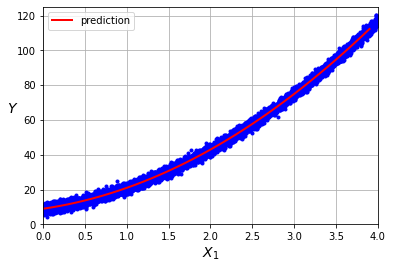

In [213]:
plt.plot(X,y,"b.")
plt.plot(X_new,y_predict,'r-',linewidth=2,label='prediction')
plt.xlabel(r'$X_1$',fontsize=14)
plt.ylabel(r'$Y$',fontsize=14,rotation=0)
plt.legend()
plt.axis([0,4,0,125])
plt.grid(True)
plt.show()

# Usando la librería de Sklearn

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

Aqui hacemos uso de la librería de PolynomialFeatures para conseguir la matriz de valores de x de una forma un poco más general, ya que podemos aplicar siempre estas líneas de codigo sin importar la cantidad de variables que tengamos

In [199]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
X_poly

array([[ 1.        ,  2.36740676,  5.60461477],
       [ 1.        ,  2.46176284,  6.06027629],
       [ 1.        ,  1.99658253,  3.98634181],
       ...,
       [ 1.        ,  3.15972189,  9.98384245],
       [ 1.        ,  0.98455363,  0.96934584],
       [ 1.        ,  3.37901704, 11.41775616]])

Ajustamos nuestro modelo y obtenemos nuestros resultados. De los coeficientes $\theta$

In [200]:
model = linear_model.LinearRegression()
model = model.fit(X_poly,y_train)
coeficiente = model.coef_
intercepto = model.intercept_
print(intercepto,coeficiente[0,1:])

[9.00399669] [7.01696563 4.99477762]


Generemos un vector de predicciones con la intención de graficar y poder observar el modelo de predicción

In [202]:
x_axis = np.arange(0,4,0.1)
y_new_predict = intercepto + coeficiente[0,1] * x_axis + coeficiente[0,2] *x_axis**2

Graficamos los resultados

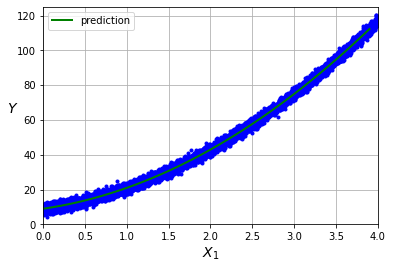

In [203]:
plt.plot(X,y,"b.")
plt.plot(x_axis,y_new_predict,'g-',linewidth=2,label='prediction')
plt.xlabel(r'$X_1$',fontsize=14)
plt.ylabel(r'$Y$',fontsize=14,rotation=0)
plt.legend()
plt.axis([0,4,0,125])
plt.grid(True)
plt.show()

Para determinar que tan efectivo es nuestro modelo. Generamos las predicciones que corresponden a los valores de $y$ para $x$

In [214]:
x_axis = X_test
y_new_predict = intercepto + coeficiente[0,1] * x_axis + coeficiente[0,2] *x_axis**2

Métricas de laregresión, Coeficiente de determinación y MSE

In [215]:
r2 = r2_score(y_test,y_new_predict)
mse = mean_squared_error(y_test,y_new_predict)
print('r2=',r2,'MSE=',mse)

r2= 0.9978525891565503 MSE= 2.2327196367227717


Observamos que parece que el resultado del modelo de sklearn es similar al modelo que generamos con los datos generados de forma aleatoria, sin acomodarlos en el rango de [0,1]